In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv('../input/student-study-hours/score.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
fig=px.scatter(df['Hours'],df['Scores'])
fig.show()

### Assign x , y

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [7]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### Split data

In [9]:
from sklearn.model_selection import train_test_split

x_train ,x_test ,y_train ,y_test =train_test_split(x,y,test_size=.20)

In [10]:
x_train

array([[5.9],
       [1.9],
       [5.1],
       [6.1],
       [5.5],
       [1.1],
       [8.5],
       [9.2],
       [3.2],
       [6.9],
       [8.9],
       [4.5],
       [2.7],
       [1.5],
       [2.5],
       [3.5],
       [7.7],
       [2.5],
       [4.8],
       [3.3]])

In [11]:
x_test

array([[8.3],
       [7.8],
       [2.7],
       [7.4],
       [3.8]])

### Build model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
y_test

array([81, 86, 30, 69, 35])

In [15]:
y_predect=model.predict(x_test)
y_predect

array([83.8696704 , 78.98004233, 29.10583611, 75.06833989, 39.86301784])

### Visualize

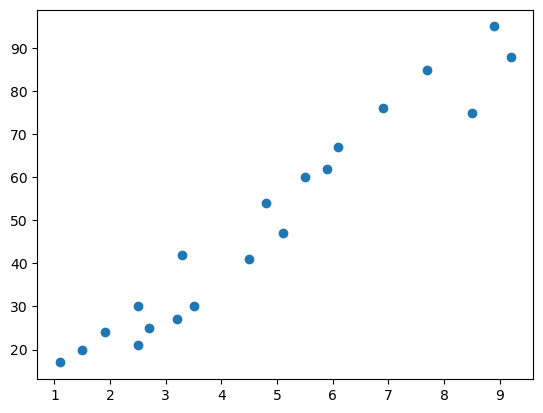

In [16]:
plt.scatter(x_train , y_train)


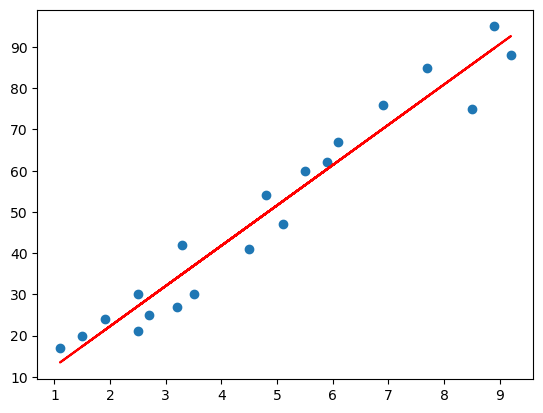

In [17]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')

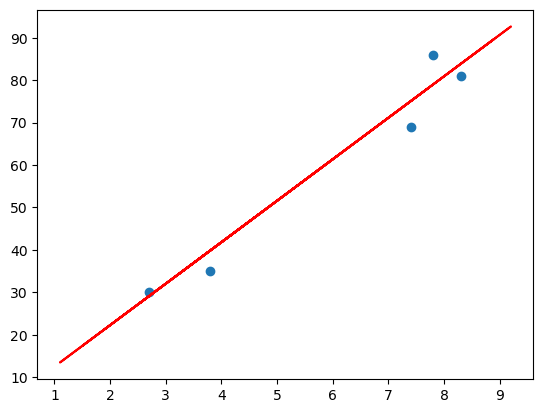

In [18]:
plt.scatter(x_test,y_test)
plt.plot(x_train,model.predict(x_train),color='red')

In [19]:
model.coef_

array([9.77925612])

In [20]:
model.intercept_

2.701844572119761

In [21]:
df2=pd.DataFrame({'Actuall':y_test.flatten(),'predected':y_predect.flatten()})
df2


,Actuall,predected
0,81,83.869670
1,86,78.980042
2,30,29.105836
3,69,75.068340
4,35,39.863018


<AxesSubplot:>

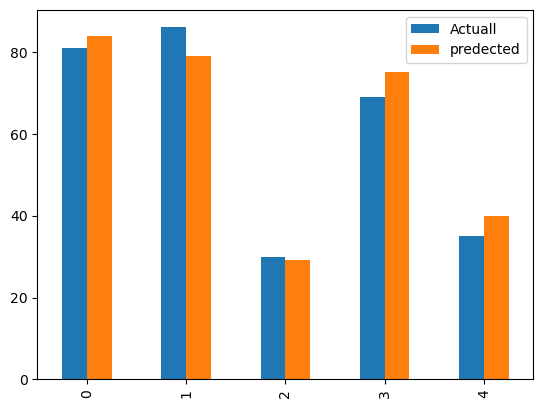

In [22]:
df2.plot(kind='bar')

___________________________________________________________________________________________________

### Build model with statsmodel

In [23]:
import statsmodels.api as sm

In [24]:
X_stat=sm.add_constant(x_train)
model2=sm.OLS(y_train,X_stat).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     343.6
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           3.56e-13
Time:                        11:21:45   Log-Likelihood:                -62.468
No. Observations:                  20   AIC:                             128.9
Df Residuals:                      18   BIC:                             130.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7018      2.828      0.955      0.352      -3.240       8.644
x1             9.7793      0.528     18.537      0.000       8.671      10.888
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                1.992
Skew:                          -0.402   Prob(JB):                        0.369
Kurtosis:                       1.680   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""